# Visualizing the fuse simulation
In this notebook we want to visualize what the simulation is doing and how the intermediate simulation steps look like. We will simulate a single event and then plot it in different stages. 

## Imports and preparation

In [1]:
import fuse
import matplotlib.pyplot as plt
import numpy as np
from straxen import URLConfig

/home/hschulze/.local/lib/python3.9/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/opt/XENONnT/anaconda/envs/XENONnT_2023.07.1/lib/python3.9/site-packages/straxen/plugins/led_cal/led_calibration.py:213: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def calc_delta_time(ext_timings_nv_delta_time, pulses, hitlets_nv, nv_pmt_start, nv_pmt_stop):


In [2]:
url_string = 'simple_load://resource://format://fax_config_nt_sr0_v4.json?&fmt=json'
config = URLConfig.evaluate_dry(url_string)

In [3]:
! rm -rf ./fuse_data

In [4]:
st = fuse.context.full_chain_context(out_dir = "./fuse_data",
                                     config = config)

st.set_config({"path": "/project2/lgrandi/xenonnt/simulations/testing",
               "file_name": "pmt_neutrons_100.root",
               "entry_stop": 50,
               "entry_start": 0,
               "source_rate": 0.001
               })

#st.set_config({"path": "/project2/lgrandi/xenonnt/simulations/lead-214/high_energy_er_fullchain_Pb214_simulations/TPC_Pb214_lower/G4outsTPCXenonProgeny1_2000_nochain_GS_42/",
#               "file_name": "nT_TPC_Pb214_2000_nochain_50.root",
#               "entry_stop": 50,
#               "entry_start": 0,
#               "source_rate": 0.001
#               })

#st.set_config({"path": "/project2/lgrandi/xenonnt/simulations/xe124/",
#               "file_name": "2vECb_Xe124_100_events.root",
#               "entry_stop": 50,
#               "entry_start": 0,
#               "source_rate": 0.001
#               })

/dali/lgrandi/xenonnt/software/cutax/v1.15.1/cutax/contexts.py:107: UserWarning: WARNING! You are using SR0_V3 simulation context! Consider updating to a newer/pinned version (SR0_V4)!
  warnings.warn(f'WARNING! You are using {faxconf_version.upper()} simulation context!'
/home/hschulze/.local/lib/python3.9/site-packages/numba/core/cpu.py:99: UserWarning: Numba extension module 'awkward.numba' failed to load due to 'AttributeError(module 'awkward.numba' has no attribute 'register')'.
  numba.core.entrypoints.init_all()
/opt/XENONnT/anaconda/envs/XENONnT_2023.07.1/lib/python3.9/site-packages/straxen/url_config.py:711: UserWarning: From straxen version 2.1.0 onward, URLConfig parameterswill be sorted alphabetically before being passed to the plugins, this will change the lineage hash for non-sorted URLs. To load data processed with non-sorted URLs, you will need to use an older version.
  warnings.warn("From straxen version 2.1.0 onward, URLConfig parameters"
/dali/lgrandi/xenonnt/softwa

## Run the simulation
Lets simulate the first event of the Pb214 file. As we are interested in the intermediate simulation steps, we will explicitly tell fuse to simulate and save them. 

In [5]:
run_number = "pmt_neutrons_0"

st.make(run_number, "geant4_interactions")
st.make(run_number, "cluster_index")
st.make(run_number, "microphysics_summary")

st.make(run_number, "drifted_electrons")
st.make(run_number, "extracted_electrons")
st.make(run_number, "electron_time")
st.make(run_number, "s2_photons")
st.make(run_number, "s2_photons_sum")
st.make(run_number, "propagated_s2_photons")


st.make(run_number, "s1_photons")
st.make(run_number, "propagated_s1_photons")

st.make(run_number, "pmt_afterpulses")
st.make(run_number, "raw_records")

st.make(run_number, "records")

Source finished!


/opt/XENONnT/anaconda/envs/XENONnT_2023.07.1/lib/python3.9/site-packages/numpy/lib/function_base.py:2387: RuntimeWarning: divide by zero encountered in func (vectorized)
  outputs = ufunc(*inputs)
/opt/XENONnT/anaconda/envs/XENONnT_2023.07.1/lib/python3.9/site-packages/numpy/lib/function_base.py:2387: RuntimeWarning: invalid value encountered in func (vectorized)
  outputs = ufunc(*inputs)
/home/hschulze/.local/lib/python3.9/site-packages/fuse/plugins/detector_physics/s2_photon_propagation.py:815: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (Array(float64, 2, 'A', False, aligned=True), Array(float64, 2, 'A', False, aligned=True))
  result[start_idx[i]: stop_idx[i]] = (matrix[i] @ split_hdiff[i].T).T
*** Detector definition message ***
You are currently using the default XENON10 template detector.



## Load the data 

In [7]:
geant4_interactions = st.get_df(run_number, ["geant4_interactions", "cluster_index"])
microphysics_summary = st.get_df(run_number, ["microphysics_summary", "drifted_electrons", "extracted_electrons","s2_photons_sum" ,"s1_photons"])
interactions_in_roi = st.get_df(run_number, ["interactions_in_roi"])
clustered_interactions = st.get_df(run_number, ["clustered_interactions"])

electron_time = st.get_df(run_number, ["electron_time"])

propagated_s2_photons = st.get_df(run_number, ["propagated_s2_photons"])
propagated_s1_photons = st.get_df(run_number, ["propagated_s1_photons"])
pmt_afterpulses = st.get_df(run_number, ["pmt_afterpulses"])

raw_records = st.get_array(run_number, "raw_records")

Loading plugins: |          | 0.00 % [00:00<?]

Loading plugins: |          | 0.00 % [00:00<?]

Loading ['interactions_in_roi']: |          | 0.00 % [00:00<?]

Loading ['clustered_interactions']: |          | 0.00 % [00:00<?]

Loading ['electron_time']: |          | 0.00 % [00:00<?]

Loading ['propagated_s2_photons']: |          | 0.00 % [00:00<?]

Loading ['propagated_s1_photons']: |          | 0.00 % [00:00<?]

Loading ['pmt_afterpulses']: |          | 0.00 % [00:00<?]

Loading raw_records: |          | 0.00 % [00:00<?]

In [9]:
microphysics_summary["r"] = np.sqrt(microphysics_summary.x**2 + microphysics_summary.y**2)
microphysics_summary["r_obs"] = np.sqrt(microphysics_summary.x_obs**2 + microphysics_summary.y_obs**2)
geant4_interactions["r"] = np.sqrt(geant4_interactions.x**2 + geant4_interactions.y**2)

In [10]:
i = 44
geant4_interactions.query(f"evtid == {i}")

,cluster_ids,time,endtime,x,y,z,t,ed,type,trackid,parenttype,parentid,creaproc,edproc,evtid,x_pri,y_pri,z_pri,r
14622,5930,32729178281350,32729178281350,-14.547701,13.905062,-148.250183,8.806361,27.862028,e-,75,gamma,8,compt,msc,44,-33.229141,0.495238,-155.606781,20.124271
14623,5931,32729178281350,32729178281350,-14.540761,13.900020,-148.243607,8.805962,33.673775,e-,75,gamma,8,compt,msc,44,-33.229141,0.495238,-155.606781,20.115772
14624,5932,32729178281350,32729178281350,-14.557902,13.905848,-148.251755,8.806746,23.665215,e-,75,gamma,8,compt,msc,44,-33.229141,0.495238,-155.606781,20.132191
14625,5933,32729178281350,32729178281350,-14.537242,13.896207,-148.243988,8.805770,32.145870,e-,75,gamma,8,compt,msc,44,-33.229141,0.495238,-155.606781,20.110594
14626,5934,32729178281350,32729178281350,-14.539576,13.890431,-148.254730,8.805316,99.131561,e-,75,gamma,8,compt,msc,44,-33.229141,0.495238,-155.606781,20.108290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16093,6315,32729178281694,32729178281694,39.118767,-38.683964,-179.134689,352.360131,2.020316,Xe132,479,neutron,442,hadElastic,ionIoni,44,-33.229141,0.495238,-155.606781,55.015697
16094,6316,32729178281697,32729178281697,37.941494,-40.204990,-179.917358,355.417479,3.051810,Xe136,480,neutron,442,hadElastic,ionIoni,44,-33.229141,0.495238,-155.606781,55.281086
16095,6317,32729178283126,32729178283126,49.900440,-43.502174,-175.209152,1784.524606,0.000142,neutron,442,neutron,406,neutronIne,hadElastic,44,-33.229141,0.495238,-155.606781,66.200401
16096,6318,32729178284635,32729178284635,48.932426,-38.839886,-158.880447,3293.727146,0.000256,neutron,442,neutron,406,neutronIne,hadElastic,44,-33.229141,0.495238,-155.606781,62.473347


In [11]:
time_cut_low = geant4_interactions.query(f"evtid == {i}").time.min()-1e8
time_cut_hig = geant4_interactions.query(f"evtid == {i}").time.max()+1e8

In [12]:
print(len(interactions_in_roi.query(f"(time >= {time_cut_low}) & (time < {time_cut_hig})")))

347


In [13]:
geant4_interactions_evt = geant4_interactions.query(f"(time >= {time_cut_low}) & (time < {time_cut_hig})")
electron_time_evt = electron_time.query(f"(time >= {time_cut_low}) & (time < {time_cut_hig})")

microphysics_summary_evt = microphysics_summary.query(f"(time >= {time_cut_low}) & (time < {time_cut_hig})")

In [14]:
geant4_interactions_evt

,cluster_ids,time,endtime,x,y,z,t,ed,type,trackid,parenttype,parentid,creaproc,edproc,evtid,x_pri,y_pri,z_pri,r
14622,5930,32729178281350,32729178281350,-14.547701,13.905062,-148.250183,8.806361,27.862028,e-,75,gamma,8,compt,msc,44,-33.229141,0.495238,-155.606781,20.124271
14623,5931,32729178281350,32729178281350,-14.540761,13.900020,-148.243607,8.805962,33.673775,e-,75,gamma,8,compt,msc,44,-33.229141,0.495238,-155.606781,20.115772
14624,5932,32729178281350,32729178281350,-14.557902,13.905848,-148.251755,8.806746,23.665215,e-,75,gamma,8,compt,msc,44,-33.229141,0.495238,-155.606781,20.132191
14625,5933,32729178281350,32729178281350,-14.537242,13.896207,-148.243988,8.805770,32.145870,e-,75,gamma,8,compt,msc,44,-33.229141,0.495238,-155.606781,20.110594
14626,5934,32729178281350,32729178281350,-14.539576,13.890431,-148.254730,8.805316,99.131561,e-,75,gamma,8,compt,msc,44,-33.229141,0.495238,-155.606781,20.108290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16093,6315,32729178281694,32729178281694,39.118767,-38.683964,-179.134689,352.360131,2.020316,Xe132,479,neutron,442,hadElastic,ionIoni,44,-33.229141,0.495238,-155.606781,55.015697
16094,6316,32729178281697,32729178281697,37.941494,-40.204990,-179.917358,355.417479,3.051810,Xe136,480,neutron,442,hadElastic,ionIoni,44,-33.229141,0.495238,-155.606781,55.281086
16095,6317,32729178283126,32729178283126,49.900440,-43.502174,-175.209152,1784.524606,0.000142,neutron,442,neutron,406,neutronIne,hadElastic,44,-33.229141,0.495238,-155.606781,66.200401
16096,6318,32729178284635,32729178284635,48.932426,-38.839886,-158.880447,3293.727146,0.000256,neutron,442,neutron,406,neutronIne,hadElastic,44,-33.229141,0.495238,-155.606781,62.473347


In [15]:
electron_time_evt

,x,y,order_index,time,endtime
704914,1.449906,-6.377918,2744,32729180501055,32729180501055
704915,1.450080,-6.378593,2748,32729180501216,32729180501216
704916,1.450194,-6.378386,2746,32729180503907,32729180503907
704917,1.449100,-6.378344,2747,32729180504030,32729180504030
704918,1.450080,-6.378593,2748,32729180504677,32729180504677
...,...,...,...,...,...
753313,-13.530837,12.952969,2548,32729180758157,32729180758157
753314,-13.528216,12.954490,2543,32729180758367,32729180758367
753315,-13.526479,12.953877,2561,32729180759004,32729180759004
753316,-13.528350,12.953148,2559,32729180761509,32729180761509


In [16]:
from hist import Hist
import matplotlib

In [17]:
start_time = geant4_interactions_evt.time.min()
end_time = geant4_interactions_evt.time.max() + 5e2

start_time_s2 = electron_time_evt.time.min()
end_time_s2 = electron_time_evt.time.max()

time_bins = 100
time_bins_s2 = 1000

In [18]:
start_time-end_time

-4476.0

In [19]:
geant4_time_hist = Hist.new.Reg(time_bins, start_time, end_time, name="time").Double()
geant4_time_hist.fill(geant4_interactions_evt.time.values)



Hist(Regular(100, 3.27292e+13, 3.27292e+13, name='time'), storage=Double()) # Sum: 1476.0

In [20]:
microphysics_summary_hist = Hist.new.Reg(time_bins, start_time, end_time, name="time").Double()
microphysics_summary_hist.fill(microphysics_summary.time.values)

Hist(Regular(100, 3.27292e+13, 3.27292e+13, name='time'), storage=Double()) # Sum: 320.0 (4303.0 with flow)

In [21]:
electron_time_hist = Hist.new.Reg(time_bins_s2, start_time_s2, end_time_s2, name="time").Double()
electron_time_hist.fill(electron_time.time.values)

Hist(Regular(1000, 3.27292e+13, 3.27292e+13, name='time'), storage=Double()) # Sum: 48403.0 (933650.0 with flow)

In [22]:
s1_photons_hist = Hist.new.Reg(time_bins, start_time, end_time, name="time").Double()
s1_photons_hist.fill(propagated_s1_photons.time.values)

Hist(Regular(100, 3.27292e+13, 3.27292e+13, name='time'), storage=Double()) # Sum: 105845.0 (979915.0 with flow)

In [23]:
s2_photons_hist = Hist.new.Reg(time_bins_s2, start_time_s2, end_time_s2, name="time").Double()
s2_photons_hist.fill(propagated_s2_photons.time.values)

Hist(Regular(1000, 3.27292e+13, 3.27292e+13, name='time'), storage=Double()) # Sum: 1365486.0 (24357925.0 with flow)

In [24]:
ap_photons_hist = Hist.new.Reg(time_bins_s2, start_time_s2, end_time_s2, name="time").Double()
ap_photons_hist.fill(pmt_afterpulses.time.values)

Hist(Regular(1000, 3.27292e+13, 3.27292e+13, name='time'), storage=Double()) # Sum: 12032.0 (214020.0 with flow)

In [25]:
time_bin_edges = geant4_time_hist.axes.edges[0]
time_bin_edges_start = time_bin_edges[:-1]
time_bin_edges_end = time_bin_edges[1:]

def sum_value_in_interval(time_start, time_end, interaction_df, value="ed"):
    value_sum_in_interval = []
    for begin, end in zip(time_start, time_end):
        value_sum_in_interval.append(interaction_df[(interaction_df.time >= begin) & (interaction_df.time < end)][value].sum())
    value_sum_in_interval = np.array(value_sum_in_interval)

    return value_sum_in_interval

energy_in_interval_g4 = sum_value_in_interval(time_bin_edges_start, time_bin_edges_end, geant4_interactions_evt)
energy_in_interval_microphysics = sum_value_in_interval(time_bin_edges_start, time_bin_edges_end, microphysics_summary)

photons_in_interval_microphysics = sum_value_in_interval(time_bin_edges_start, time_bin_edges_end, microphysics_summary, "photons")
electrons_in_interval_microphysics = sum_value_in_interval(time_bin_edges_start, time_bin_edges_end, microphysics_summary, "electrons")

s1_photon_hits_in_interval = sum_value_in_interval(time_bin_edges_start, time_bin_edges_end, microphysics_summary, "n_electron_interface")
n_electron_interface_in_interval = sum_value_in_interval(time_bin_edges_start, time_bin_edges_end, microphysics_summary, "n_s1_photon_hits")

In [26]:
cmap = matplotlib.colormaps.get_cmap('plasma')
#norm = matplotlib.colors.Normalize(vmin=0, vmax=np.max(energy_in_interval))
norm_g4 = matplotlib.colors.LogNorm(vmin=None, vmax=np.max(energy_in_interval_g4)*2)
norm_microphysics = matplotlib.colors.LogNorm(vmin=None, vmax=np.max(energy_in_interval_microphysics)*2)

color_for_interval_g4 = cmap(norm_g4(energy_in_interval_g4))
color_for_interval_microphysics = cmap(norm_microphysics(energy_in_interval_microphysics))

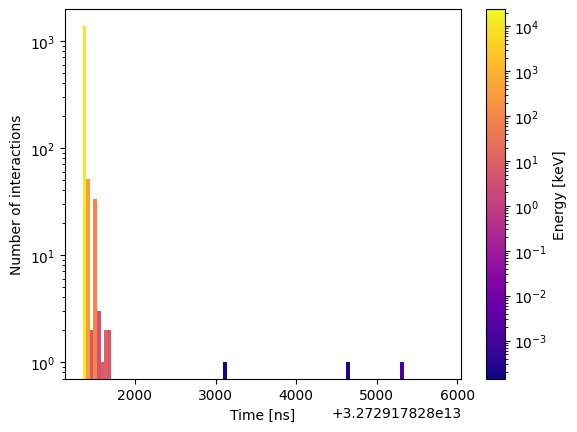

In [27]:
fig1, ax1 = plt.subplots()

ax1.bar(geant4_time_hist.axes.centers[0], geant4_time_hist.values(), width=geant4_time_hist.axes.widths[0], color=color_for_interval_g4
        )
ax1.set_xlabel("Time [ns]")
ax1.set_ylabel("Number of interactions")
ax1.set_yscale("log")


plt.colorbar(matplotlib.cm.ScalarMappable(norm=norm_g4, cmap=cmap), label="Energy [keV]", ax = ax1)

plt.show()

In [28]:
def tpc_scatter_plot(dataframe, column="ed", label = "Energy [keV]"):
    
    norm = matplotlib.colors.LogNorm(vmin=None, vmax=np.max(dataframe[column])*2)
    
    plot_range = 68

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(13, 5))

    cmap_object = axes[0].scatter(dataframe.x,
            dataframe.y,
            c=dataframe[column],
            cmap="plasma",
            norm=norm,
            s = np.array(norm(dataframe[column]))*50
            )

    circle = plt.Circle((0, 0), st.config["tpc_radius"], color='k', fill=False, ls = "--")

    axes[0].add_patch(circle)

    axes[0].set_xlim(-plot_range, plot_range)
    axes[0].set_ylim(-plot_range, plot_range)
    axes[0].set_xlabel("x [cm]")
    axes[0].set_ylabel("y [cm]")

    axes[0].set_box_aspect(1)
    


    axes[1].scatter(dataframe.r,
            dataframe.z,
            c=dataframe[column],
            cmap="plasma",
            norm=norm,
            s = np.array(norm(dataframe[column]))*50
            )
    axes[1].plot([st.config["tpc_radius"], st.config["tpc_radius"]], [-st.config["tpc_length"], 0], color='k', ls = "--")
    axes[1].plot([0, st.config["tpc_radius"]], [-st.config["tpc_length"], -st.config["tpc_length"]], color='k', ls = "--")
    axes[1].plot([0, st.config["tpc_radius"]], [0, 0], color='k', ls = "--")
    axes[1].set_xlim(0, 75)
    axes[1].set_ylim(-165, 10)
    axes[1].set_xlabel("r [cm]")
    axes[1].set_ylabel("z [cm]")

    axes[1].set_box_aspect(1)

    fig.colorbar(cmap_object, ax=axes.ravel().tolist(), label = label)

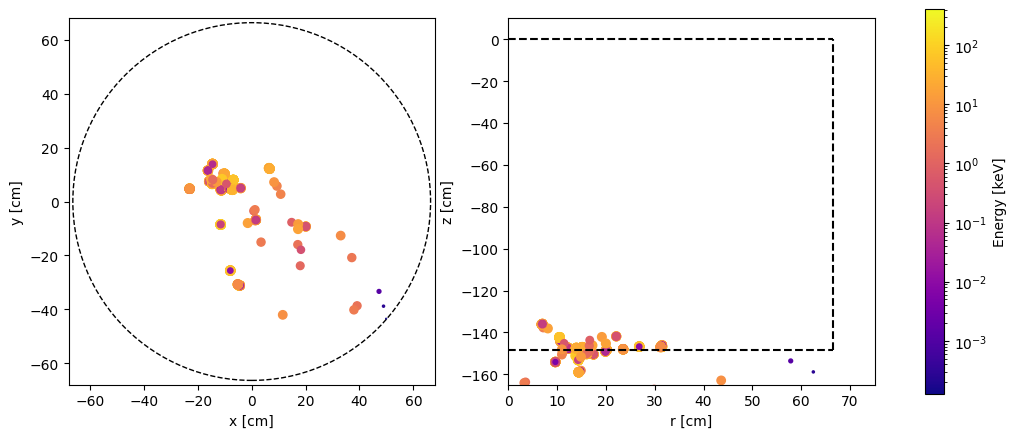

In [29]:
tpc_scatter_plot(geant4_interactions_evt)

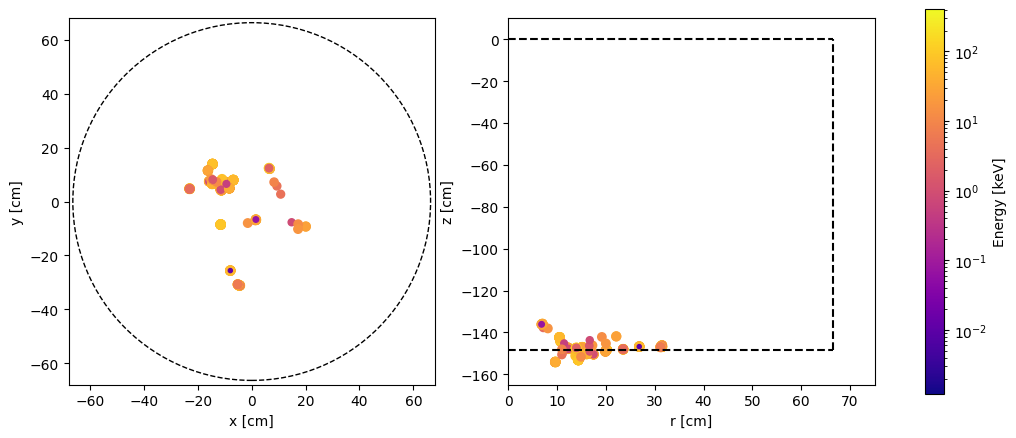

In [30]:
tpc_scatter_plot(microphysics_summary_evt)

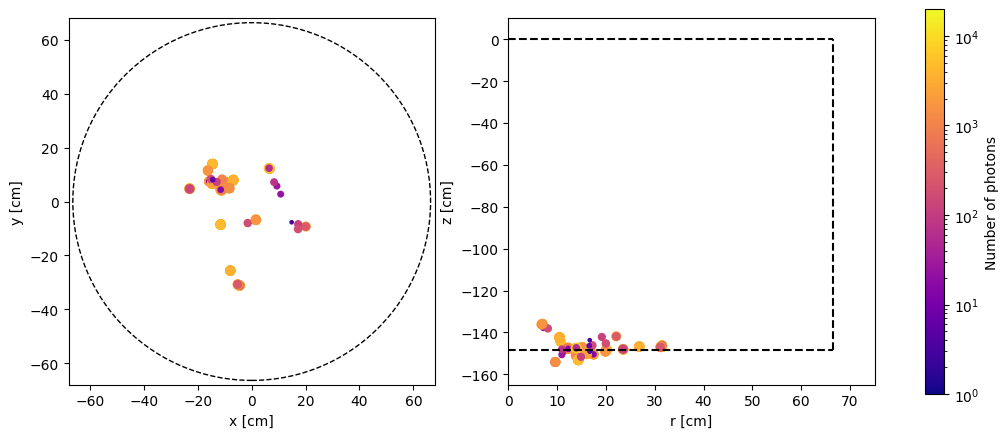

In [31]:
tpc_scatter_plot(microphysics_summary_evt, column="photons", label="Number of photons")

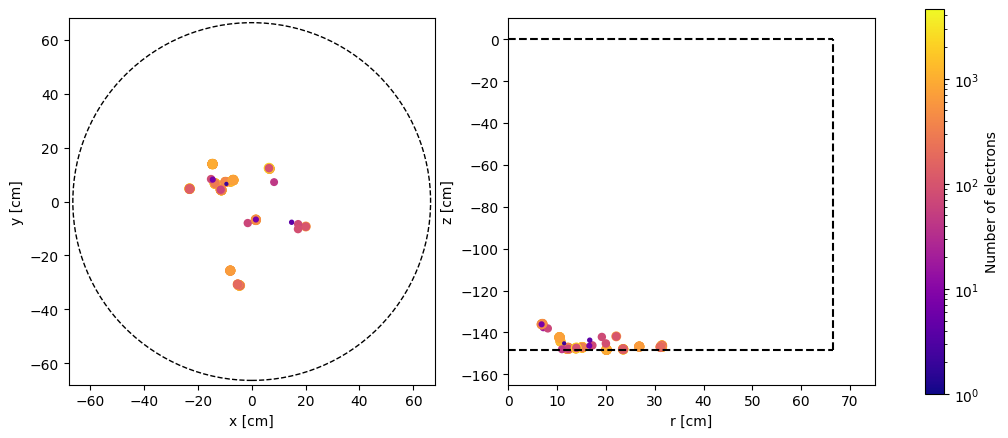

In [32]:
tpc_scatter_plot(microphysics_summary_evt, column="electrons", label="Number of electrons")

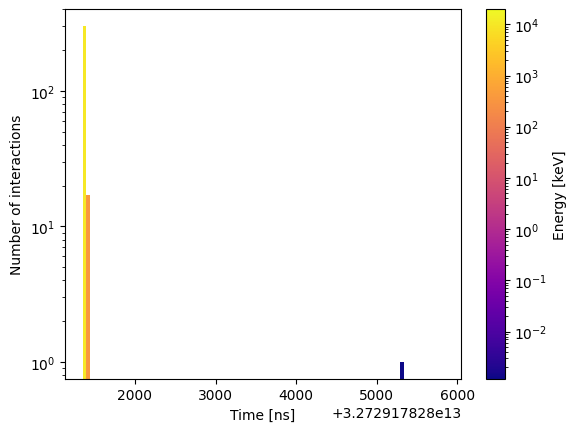

In [33]:
fig1, ax1 = plt.subplots()

ax1.bar(microphysics_summary_hist.axes.centers[0], microphysics_summary_hist.values(), width=microphysics_summary_hist.axes.widths[0], color=color_for_interval_microphysics
        )
ax1.set_xlabel("Time [ns]")
ax1.set_ylabel("Number of interactions")
ax1.set_yscale("log")


plt.colorbar(matplotlib.cm.ScalarMappable(norm=norm_microphysics, cmap=cmap), label="Energy [keV]", ax = ax1)

plt.show()

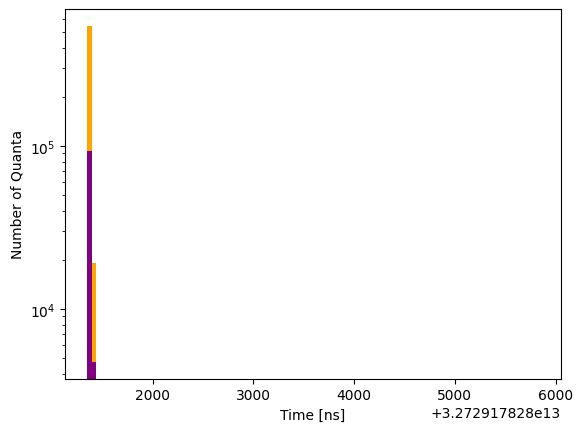

In [34]:
fig1, ax1 = plt.subplots()

ax1.bar(microphysics_summary_hist.axes.centers[0],
        photons_in_interval_microphysics,
        width=microphysics_summary_hist.axes.widths[0],
        color="orange",
        label="Photons",
        alpha = 1,
        )

ax1.bar(microphysics_summary_hist.axes.centers[0],
        electrons_in_interval_microphysics,
        width=microphysics_summary_hist.axes.widths[0],
        color="purple",
        label="Electrons",
        alpha = 1,
        )

ax1.set_xlabel("Time [ns]")
ax1.set_ylabel("Number of Quanta")
ax1.set_yscale("log")


#plt.colorbar(matplotlib.cm.ScalarMappable(norm=norm_microphysics, cmap=cmap), label="Energy [keV]", ax = ax1)

plt.show()

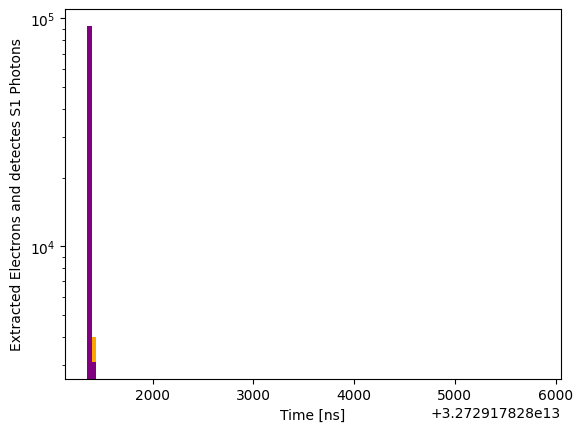

In [35]:
fig1, ax1 = plt.subplots()

ax1.bar(microphysics_summary_hist.axes.centers[0],
        s1_photon_hits_in_interval,
        width=microphysics_summary_hist.axes.widths[0],
        color="orange",
        label="Photons",
        alpha = 1,
        )

ax1.bar(microphysics_summary_hist.axes.centers[0],
        n_electron_interface_in_interval,
        width=microphysics_summary_hist.axes.widths[0],
        color="purple",
        label="Electrons",
        alpha = 1,
        )

ax1.set_xlabel("Time [ns]")
ax1.set_ylabel("Extracted Electrons and detectes S1 Photons")
ax1.set_yscale("log")


#plt.colorbar(matplotlib.cm.ScalarMappable(norm=norm_microphysics, cmap=cmap), label="Energy [keV]", ax = ax1)

plt.show()

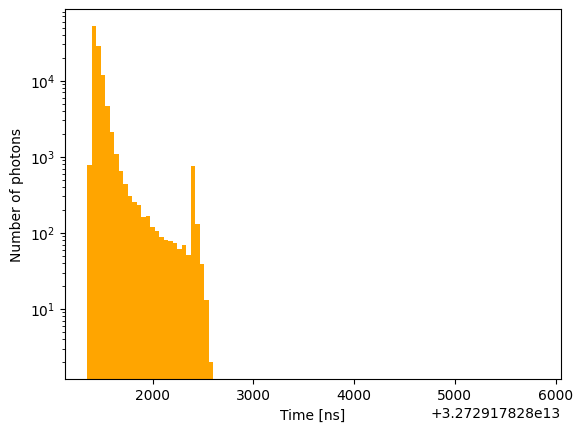

In [36]:
fig1, ax1 = plt.subplots()

ax1.bar(s1_photons_hist.axes.centers[0], s1_photons_hist.values(), width=s1_photons_hist.axes.widths[0],
        color="orange",
        )

ax1.set_xlabel("Time [ns]")
ax1.set_ylabel("Number of photons")
ax1.set_yscale("log")


plt.show()

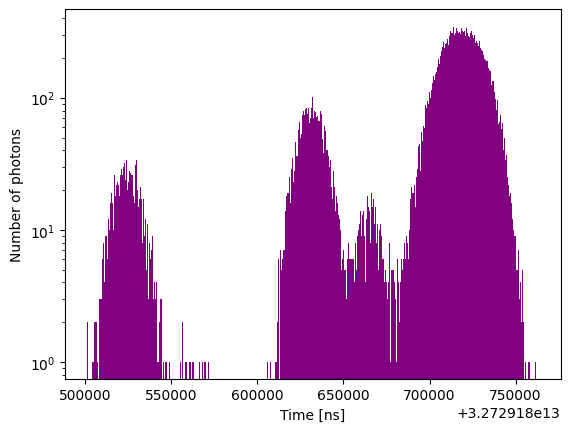

In [37]:
fig1, ax1 = plt.subplots()

ax1.bar(electron_time_hist.axes.centers[0], electron_time_hist.values(), width=electron_time_hist.axes.widths[0],
        color="purple",
        )

#ax1.bar(s2_photons_hist.axes.centers[0], s2_photons_hist.values(), width=s2_photons_hist.axes.widths[0],
#        color="orange",
#        )

#ax1.bar(ap_photons_hist.axes.centers[0], ap_photons_hist.values(), width=ap_photons_hist.axes.widths[0],
#        color="green",
#        )

ax1.set_xlabel("Time [ns]")
ax1.set_ylabel("Number of photons")
ax1.set_yscale("log")


plt.show()

In [38]:
raw_records

array([(  242957108870,  53, 10, 363,  53, 0, 0, [15999, 15989, 15958, 15982, 15992, 15997, 15999, 15999, 15994, 15997, 15995, 15996, 15997, 16000, 15999, 15996, 15994, 15998, 15996, 16000, 16000, 15999, 16000, 15998, 15996, 15999, 16004, 16003, 16000, 15998, 15999, 15997, 16000, 16004, 16005, 16003, 16001, 15997, 15996, 16001, 16003, 16003, 16001, 15999, 15998, 16002, 16002, 16003, 16001, 16001, 15998, 16000, 16002,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0]),
       (  242957129080, 110, 10,  21, 257, 0, 0, [16001, 15999, 16001, 15999, 16001, 16000, 16000, 16000, 16001, 16001, 16003, 15999, 16000, 15999, 16001, 16002, 16000, 15998, 16

In [39]:
import straxen

In [40]:
records_waveform = st.raw_records_matrix(run_number, ignore_time_warning = True, time_range = (start_time, end_time_s2))

ValueError: invalid literal for int() with base 10: 'pmt_neutrons_0'

In [ ]:
records_waveform = records_waveform[0].T

In [ ]:
records_waveform.shape

(494, 11294)

In [ ]:
sum_waveform = np.sum(records_waveform, axis=0)

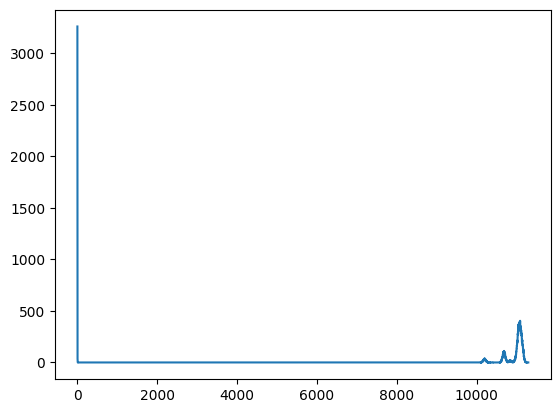

In [ ]:

plt.plot(sum_waveform)
#plt.yscale("log")
#plt.ylim(1)

In [277]:
sum_waveform

array([0., 0., 0., ..., 0., 0., 0.])